# Two Factor Model

## Potential Problems:
* parameter values to use and test out
* how to use the phi(s) initial curve estimate -> cubic interpolatoin fropm market data: f: term -> yield
* how to use estimates of a/b or (x+y) to get r since not working.
Solution:

Make the neural network the other way around to input prices and get parameters:
* 1 dim vector to predict 6/7 parameters: might not be practical


In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import tensorflow as tf

path_parent = os.path.dirname(os.getcwd())

if os.getcwd()[-8:] != 'FYP-Code':
    os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code


In [17]:
from helper.synthesis import generate_pointwise_data

generate_pointwise_data()

100%|██████████| 60000/60000 [00:17<00:00, 3374.07it/s]


Data successfully generated!


In [31]:
from analysis.pointwise.model import load_data, init_model, train_model

params_range_train, params_range_test, price_train, price_test = load_data(parameterization = 'two_factor')

(0.0, 500.0)

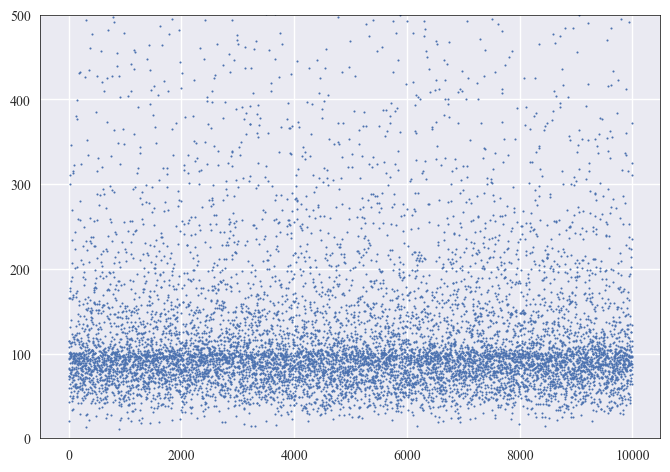

In [35]:
plt.plot(price_test, linestyle = '', marker = 'o', markersize = 1.5)
plt.ylim(0, 500)

In [37]:
params_range_train

array([[ 6.67060493e+00,  9.55265921e-02,  8.16483941e-02, ...,
         1.11088518e-02,  4.34441407e-02, -3.06588443e-01],
       [ 1.96135769e+00,  3.97389956e-02,  5.72114869e-02, ...,
         2.08267638e-02,  8.17855298e-03, -7.21195353e-01],
       [ 8.41000267e+00,  6.10093502e-02,  1.39131152e-02, ...,
         3.94998250e-02,  2.83831397e-02,  1.91286521e-01],
       ...,
       [ 1.79655466e+01,  1.87436457e-02,  7.62627044e-02, ...,
         3.21534526e-02,  2.17620294e-02, -9.01998367e-01],
       [ 8.98115316e+00,  2.39637327e-02,  4.82287371e-02, ...,
         1.42851548e-02,  3.22787046e-02, -2.86421440e-01],
       [ 1.98187088e+01,  6.24377073e-02,  8.80785513e-02, ...,
         1.14463574e-02,  3.50357506e-02, -5.94159903e-01]])

In [39]:
model = init_model(parameterization = 'two_factor')

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  320       
                                                                 
 dense_5 (Dense)             multiple                  1056      
                                                                 
 batch_normalization_1 (Batc  multiple                 128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             multiple                  1056      
                                                                 
 dense_7 (Dense)             multiple                  33        
                                                                 
Total params: 2,593
Trainable params: 2,529
Non-trainable params: 64
__________________________________________________

2023-02-13 15:36:20,744 | INFO: | model.py | train_model | 222: Beginning training for model dense with two_factor


100%|██████████| 200/200 [04:09<00:00,  1.25s/it]

2023-02-13 15:40:30,104 | INFO: | model.py | train_model | 271: Saved weights to file: weights/pointwise/pointwise_weights_dense_two_factor.h5


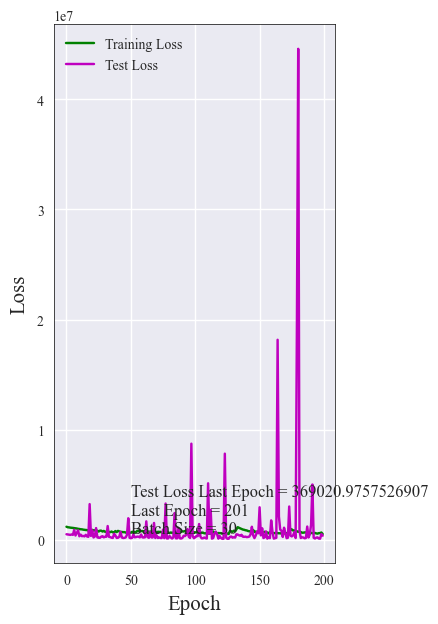

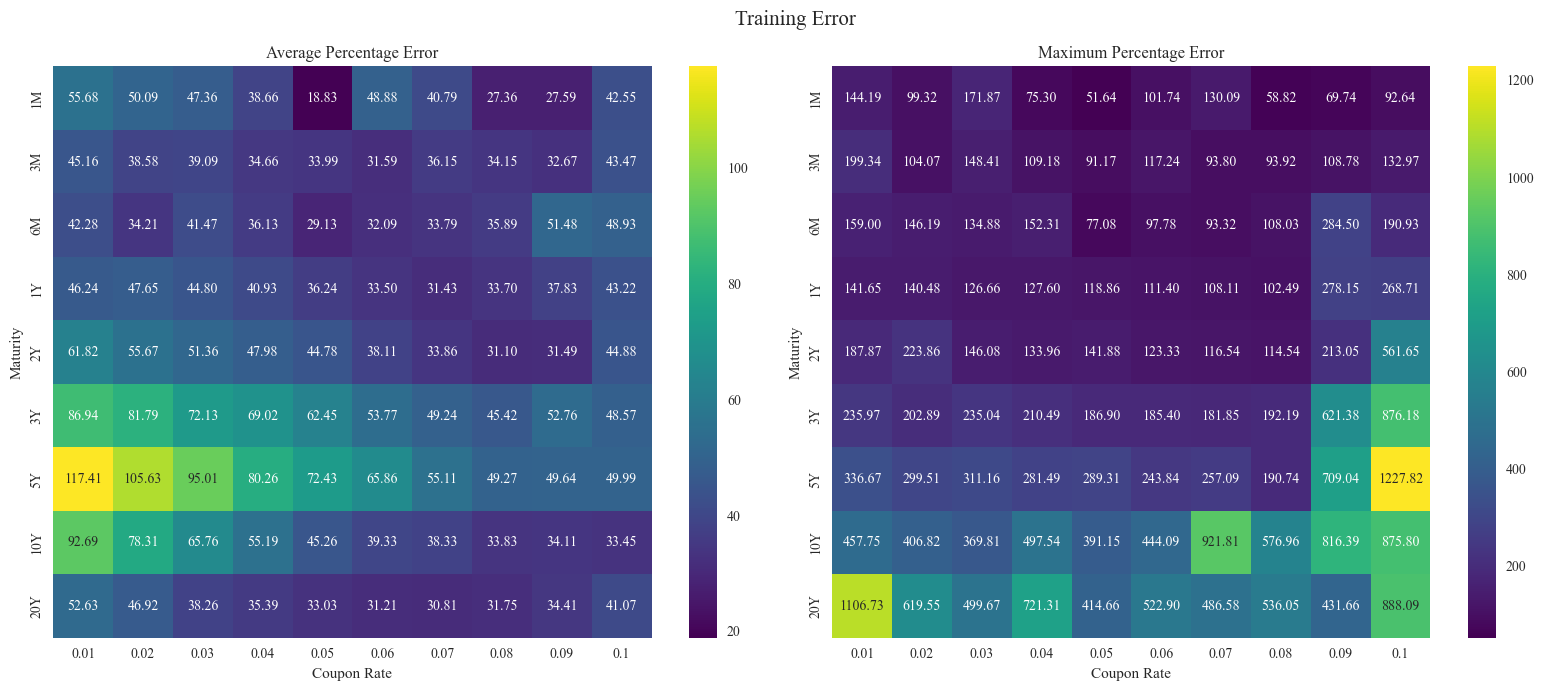

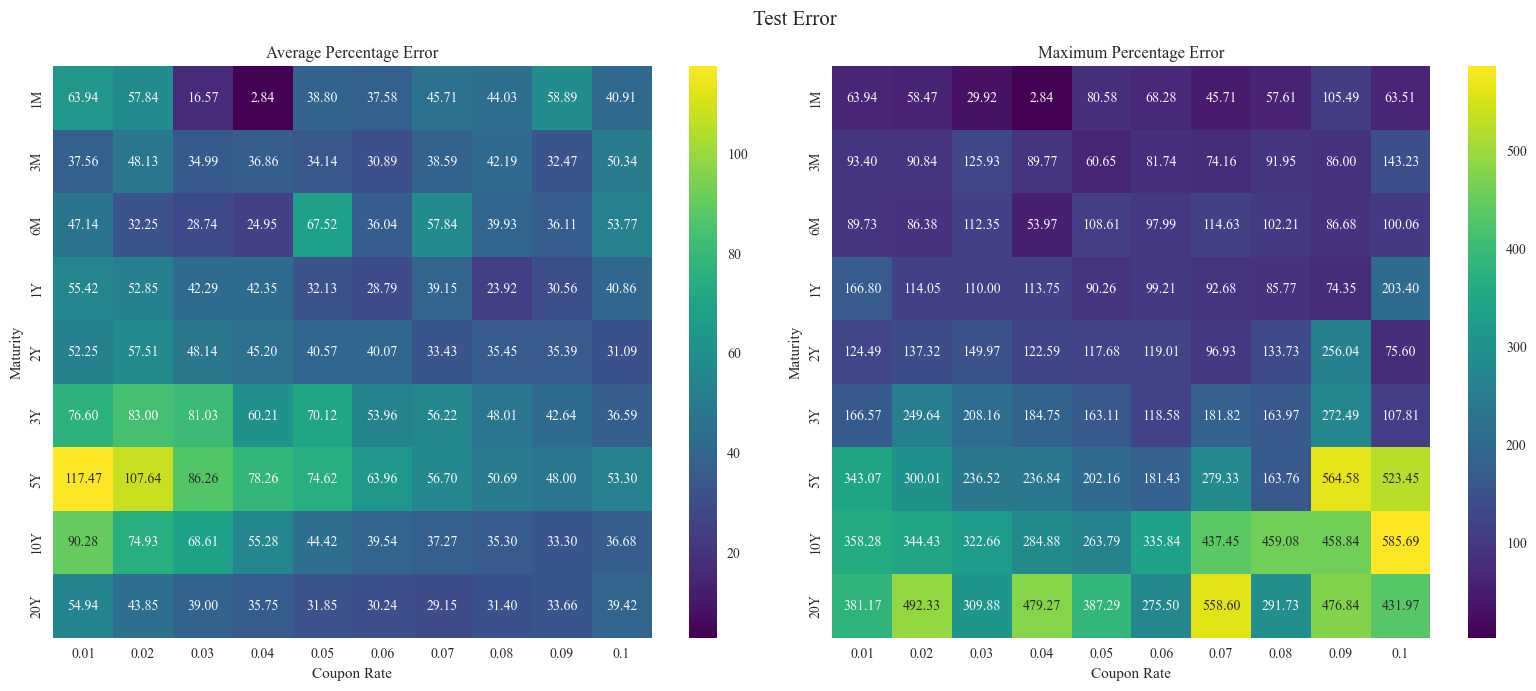

In [40]:
train_model(model = model, epochs = 200, plot = True);